In [1]:
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv(r'.\aprsdata.csv')

In [3]:
# df['time'] = df['time'].apply(lambda x: x - dt.timedelta(4/24))
# df['lasttime'] = df['lasttime'].apply(lambda x: x - dt.timedelta(4/24))

In [4]:
df['time'] = pd.to_datetime(df['time'])
df['lasttime'] = pd.to_datetime(df['lasttime'])

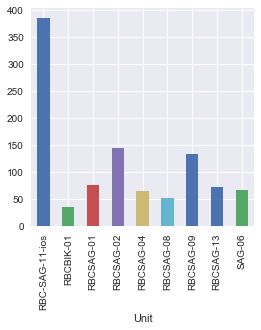

In [5]:
df.groupby(by=['Unit'])['lat'].count().plot(kind='bar', figsize=(4,4))

In [6]:
df['c'] = ''
for i,j in zip(df.Unit.unique(),['r','y','b','g','k','m','w','c']):
    df.loc[df['Unit'] == i,'c'] = j

In [7]:
df.loc[df['unit2'] == '-SAG-11-ios','unit2'] = 'SAG-11'
df.loc[df['unit2'] == 'BIK-01','unit2'] = 'BIKE-01'

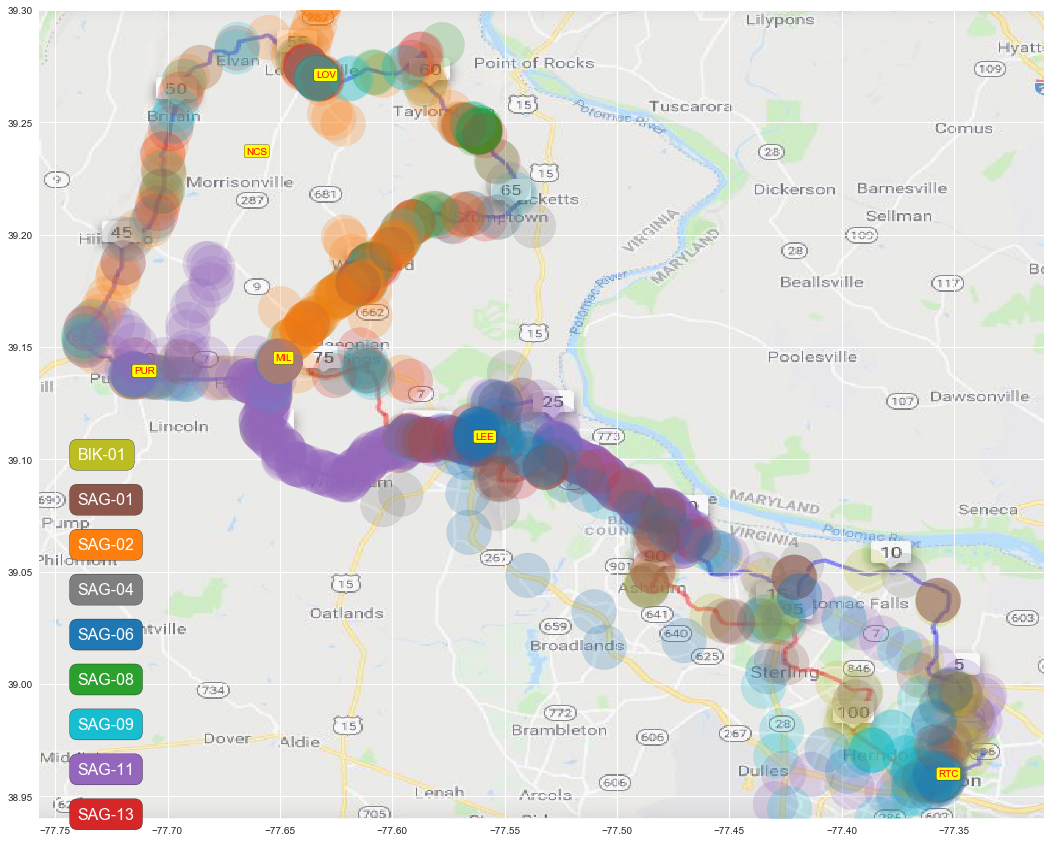

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread
import matplotlib.cbook as cbook

df2 = pd.read_csv(r'aprsdata.csv')

x = df2['lng']
y = df2['lat']
u = df2['unit2'].values
c = df2['c']

img = imread(r'.\rbc.jpg')
plt.figure(figsize=(18,18))

plt.imshow(img, extent=[-77.757,-77.31, 38.94, 39.3], alpha=0.75)
plt.scatter(x, y, c=c, s=2000, alpha=0.22)
plt.xlim(-77.757,-77.31)
plt.ylim(38.94,39.3)

# # Fixed Stations
names = ['PUR','LEE','LOV','MIL','NCS','RTC']
lats = [-77.714943,-77.563,-77.634,-77.652,-77.665,-77.357]
lons = [39.138259,39.109,39.27,39.144,39.236,38.959]

for i,j,s in zip(names,lats,lons):
    plt.annotate(i, xy=(j, s), color='red',
                 bbox=dict(boxstyle='round,pad=0.2', fc='yellow'))

legx, legy = -77.74,39.1 
for key,value in sorted(df2.groupby(by='unit2')['c'].max().to_dict().items()):
    color = 'w'
    if value == 'w':
        color = 'k'
    plt.annotate(key, xy=(legx,legy), color=color, fontsize=16,
                bbox=dict(boxstyle='round,pad=0.5', fc=value))
    legy -= .02
    
plt.show()



In [9]:
# for i in range(6,17):
#     with sns.axes_style('white'):
#         sns.jointplot("lng", "lat", data=df[(pd.datetime(2018,8,26,i,0)<df['time']) & (df['time']<pd.datetime(2018,8,26,i+1,0))], kind='scatter',
#                       xlim=(-77.75,-77.3),
#                       ylim=(38.9,39.3),
#                       size=8, ratio=2,
#                       annot_kws=dict(title=str(i)+':00hrs to '+str(i+1)+':00hrs'),
#                       marginal_kws=dict(bins=20))

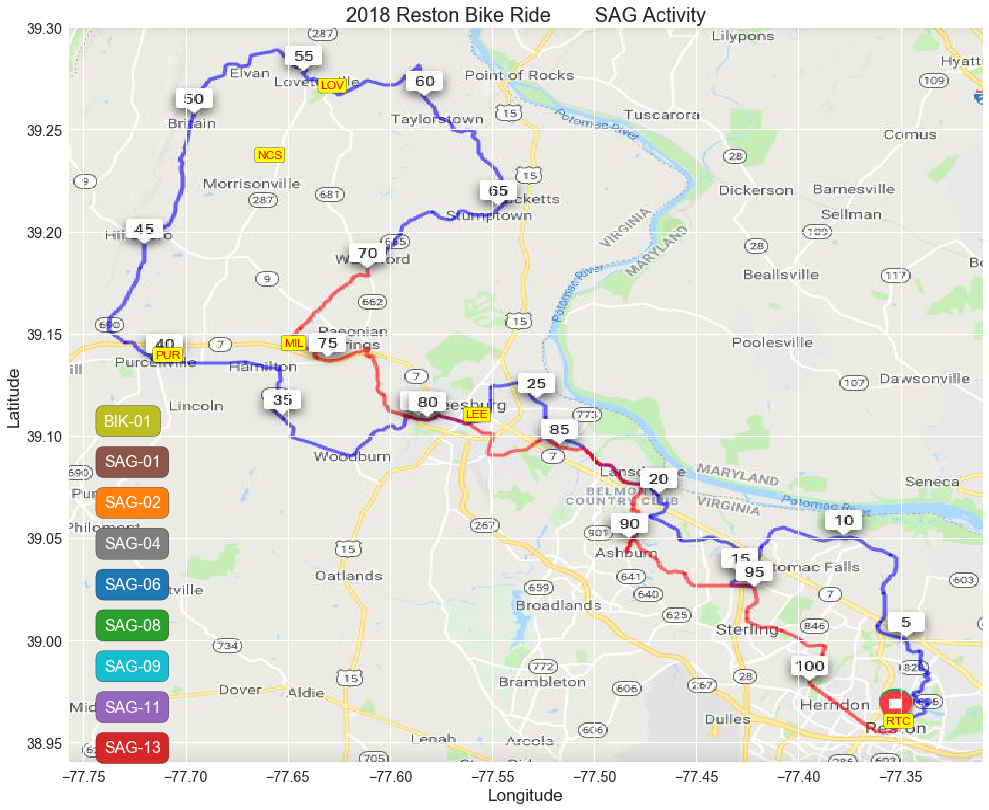

In [10]:
plt.close('all')
anim_data = pd.read_csv(r'.\animationdata.csv')

import numpy as np
from scipy.misc import imread
import seaborn as sns
from matplotlib import gridspec
from matplotlib import animation

img_rbc = imread(r".\rbc.jpg")   

params = {'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.labelsize':'xx-large',
         'figure.titlesize':'xx-large'}
plt.rcParams.update(params)


fig = plt.figure(figsize=(18,18))
gs = gridspec.GridSpec(1, 2, width_ratios=[100, 0]) 
ax1 = fig.add_subplot(gs[0])
ax1.set_xlim(-77.757,-77.31)
ax1.set_ylim(38.94,39.3)
ax1.imshow(img_rbc, extent=[-77.757,-77.31, 38.94, 39.3])#, alpha=0.5)
# # Fixed Stations
names = ['PUR','LEE','LOV','MIL','NCS','RTC']
lats = [-77.714943,-77.563,-77.634,-77.652,-77.665,-77.357]
lons = [39.138259,39.109,39.27,39.144,39.236,38.959]

for i,j,s in zip(names,lats,lons):
    ax1.annotate(i, xy=(j, s), color='red', fontsize=12,
                 bbox=dict(boxstyle='round,pad=0.2', fc='yellow'))

legx, legy = -77.74,39.105
for key,value in sorted(df2.groupby(by='unit2')['c'].max().to_dict().items()):
    color = 'w'
    if value == 'w':
        color = 'k'
    ax1.annotate(key, xy=(legx,legy), color=color, fontsize=16,
                bbox=dict(boxstyle='round,pad=0.5', fc=value))
    legy -= .02
ax1.set_title('2018 Reston Bike Ride        SAG Activity', fontsize=20)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
scat = ax1.scatter([], [], s=500, edgecolors='k')#, alpha=0.4)
date_text = ax1.text(0.03, 0.50, '', transform=ax1.transAxes, fontsize=22)

def init():
    scat.set_offsets([])
    return scat

def animate(i):
    timestamp = df2.time.unique()[i]
    x = df2.loc[df2['time'] == timestamp, 'lng'].values
    y = df2.loc[df2['time'] == timestamp, 'lat'].values
    c = df2.loc[df2['time'] == timestamp, 'c']
    data = np.hstack((x[:,np.newaxis], y[:, np.newaxis]))
    scat.set_offsets(data)
    scat.set_color(c)
    date_text.set_text(pd.to_datetime(timestamp).strftime("%H:%M"))
    return scat

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(df2.time.unique()), interval=100, repeat=True)
anim.save('SAGprs.mp4', extra_args=['-vcodec', 'libx264'])
plt.show()